<a href="https://colab.research.google.com/github/nohaa852/ss_project/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
def get_path(dataset_name,env_name='colab'):
    """
    This function is used to return the path of the dataset you want to use. 
    
    @params:
    dataset_name: the name of the dataset. 
    env_name: it has two values either local, or colab the default is colab
    """
    prefix = 'https://raw.githubusercontent.com/Nourankh20/Data-Visualization/main/datasets/'
    if env_name == 'colab':
        return prefix+dataset_name
    else:
        return f'../datasets/{dataset_name}'


In [23]:
athlete_events_df =  pd.read_csv(get_path('athlete_events.csv'))

In [24]:
athlete_events_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
noc_regions = pd.read_csv(get_path('noc_regions.csv'))

In [ ]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
athlete_events_df[athlete_events_df['Year']==2012]['City'].unique()

array(['London'], dtype=object)

In [ ]:
df = pd.merge(athlete_events_df,noc_regions,left_on='NOC',right_on='NOC')

#Exploring the data


*   determine null values percentage among attrebutes using:
  *   .isna() function to detect missing values
  *   .sum() function to find total number of missing values
  *   .len() function to find total number of attrebutes
*   visualize gender distribution using: 
  *   area graphs 
  *   scatter plot
  *   pie chart
*   determine participants' height variation over the years using:
  *   boxplot
*   determine participants' Weight variation over the years using:
  *   boxplot




In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [28]:
null_values_percentages = df.isna().sum()/len(df) *100
null_values_percentages

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494517
Height    22.189927
Weight    23.187833
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.310618
region     0.007756
notes     98.138990
dtype: float64

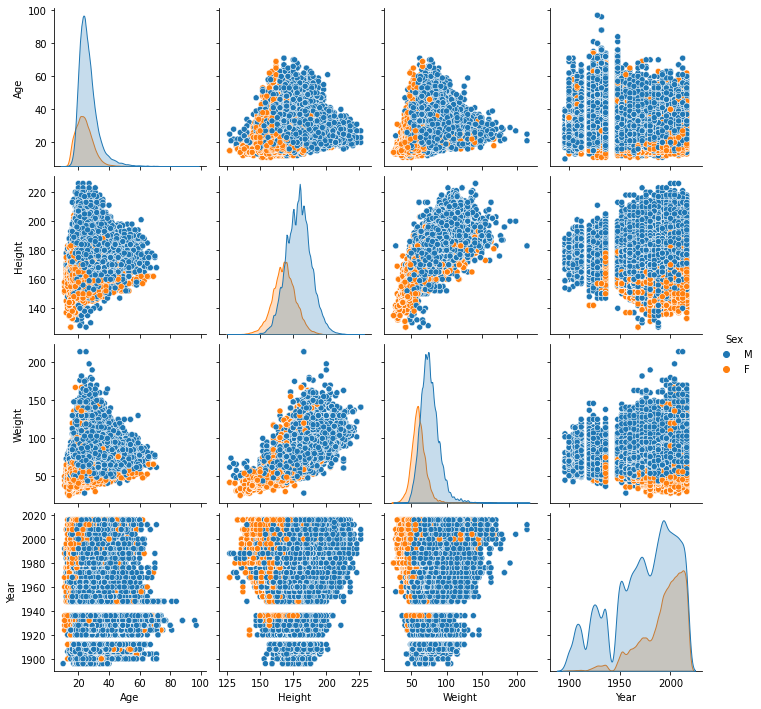

In [29]:
no_id = df.drop(columns=['ID'])
sns.pairplot(no_id, hue="Sex")

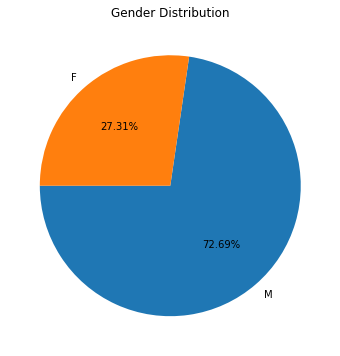

In [ ]:
gender_counts = tmp_medal.Sex.value_counts()
gender_counts

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct="%0.2f%%", startangle=180);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Height over time')

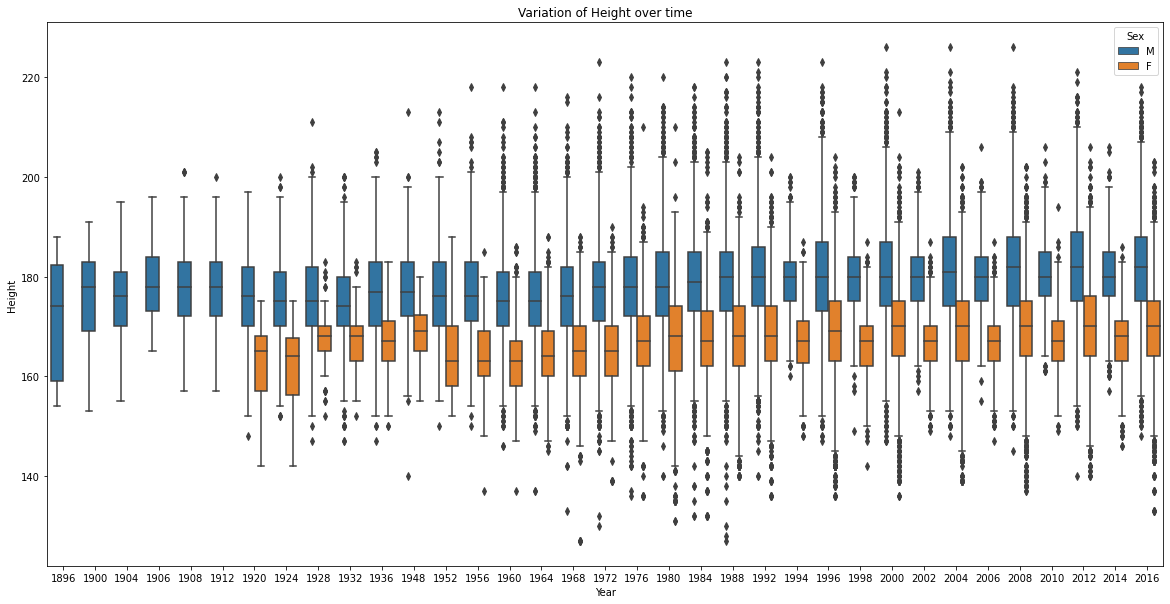

In [32]:
#Variation of Height over time
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Height', data=df , hue='Sex')
plt.title('Variation of Height over time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Weight over time')

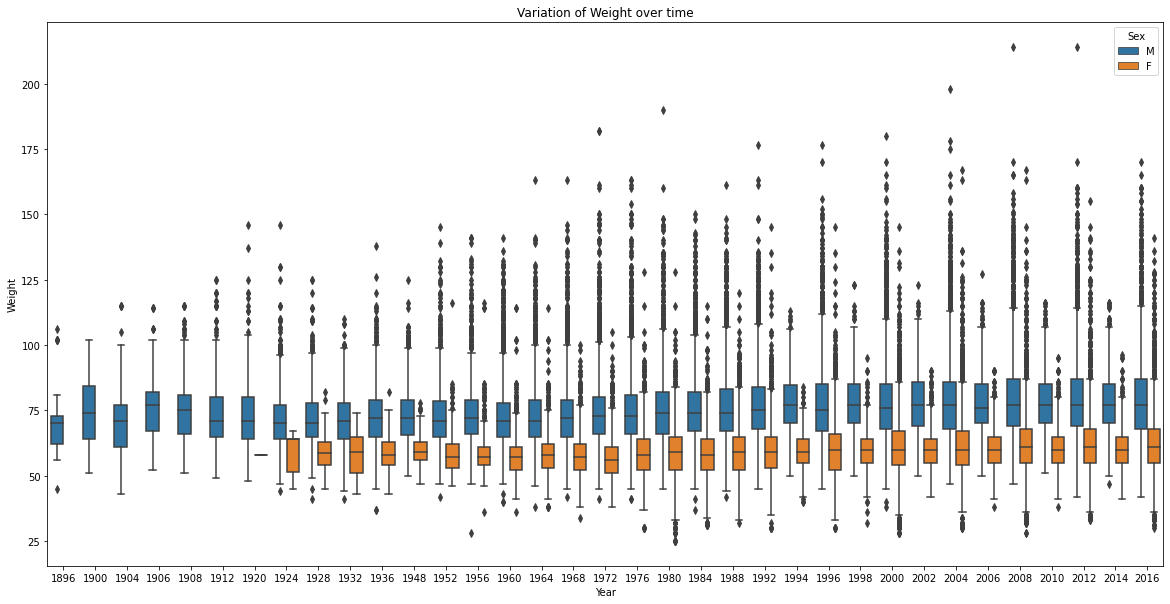

In [33]:
#Variation of Weight over time
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Weight', data=df , hue='Sex')
plt.title('Variation of Weight over time')

#Dealing with outliers


* drop null values in females and males height using: 
    * boxplot
* remove outliers from females and males height
* determine null values percentage among heights
      after outliers removal which have been reduced to 0.992370 % in females
      after outliers removal which have been reduced to 1.530413 % in males

* drop null values in females and males weight using: 
    * boxplot
* remove outliers from females and males weight
* determine null values percentage among weights
      after outliers removal which have been reduced to 1.082585 % in females
      after outliers removal which have been reduced to 1.773584 % in males





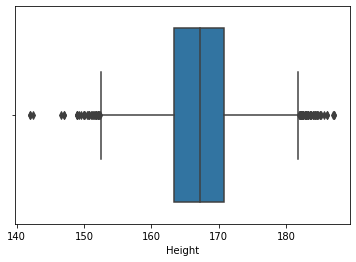

In [34]:
import seaborn as sns

Females= df[df['Sex']=='F']
Males=df[df['Sex']=='M']


sports_height_females = Females.groupby(['Sport','region'])['Height'].mean()
sports_height_males = Males.groupby(['Sport','region'])['Height'].mean()


dropped_null_values_height_females = sports_height_females.dropna(how='all')
dropped_null_values_height_females.values

dropped_null_values_height_males = sports_height_males.dropna(how='all')
dropped_null_values_height_males

ay = sns.boxplot(x=dropped_null_values_height_females)

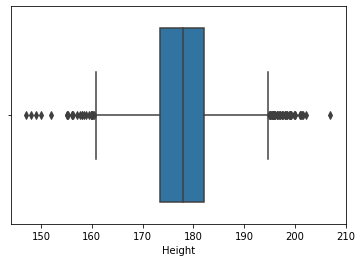

In [ ]:
ay = sns.boxplot(x=dropped_null_values_height_males)

In [35]:
#Removed outliers in female height

Q1 = np.percentile(dropped_null_values_height_females.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_height_females.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1


Females = Females[~(Females['Height'] >= (Q3+1.5*IQR))]
Females = Females[~(Females['Height'] <= (Q1-1.5*IQR))]




#Removed outliers in male height

Q1 = np.percentile(dropped_null_values_height_males.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_height_males.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Males = Males[~(Males['Height'] >= (Q3+1.5*IQR))]
Males = Males[~(Males['Height'] <= (Q1-1.5*IQR))]

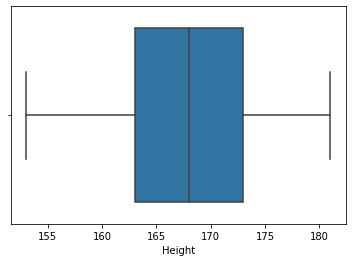

In [36]:
ax = sns.boxplot(x=Females['Height'])

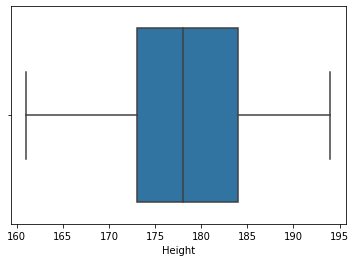

In [37]:
ax = sns.boxplot(x=Males['Height'])

ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.839100
Height    28.510205
Weight    29.559538
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.901571
region     0.006999
notes     97.906718
dtype: float64

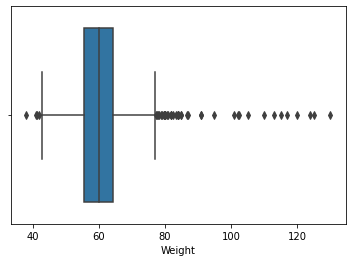

In [38]:
sports_weight_females = Females.groupby(['Sport', 'region'])['Weight'].mean()
sports_weight_males = Males.groupby(['Sport', 'region'])['Weight'].mean()


dropped_null_values_weight_females = sports_weight_females.dropna(how='all')
dropped_null_values_weight_females.values

dropped_null_values_weight_males = sports_weight_males.dropna(how='all')
dropped_null_values_weight_males


ay = sns.boxplot(x=dropped_null_values_weight_females)

Males.isna().sum()/len(Males) *100

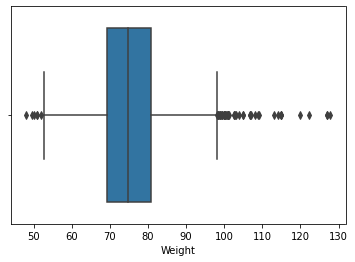

In [39]:
ay = sns.boxplot(x=dropped_null_values_weight_males)

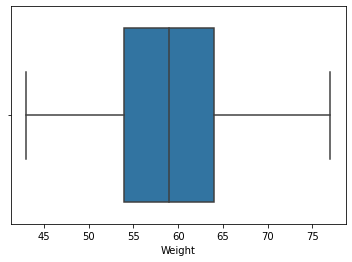

In [42]:
#Removed outliers in female weight

Q1 = np.percentile(dropped_null_values_weight_females.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_weight_females.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Females = Females[~(Females['Weight'] >= (Q3+1.5*IQR))]
Females = Females[~(Females['Weight'] <= (Q1-1.5*IQR))]


#Removed outliers in male weight

Q1 = np.percentile(dropped_null_values_weight_males.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_weight_males.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Males = Males[~(Males['Weight'] >= (Q3+1.5*IQR))]
Males = Males[~(Males['Weight'] <= (Q1-1.5*IQR))]

ay = sns.boxplot(x=Females['Weight'])

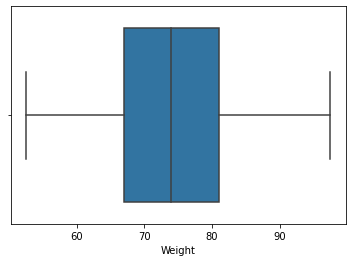

In [43]:
ay = sns.boxplot(x=Males['Weight'])

In [44]:
Males['Weight']
Males.isna().sum()/len(Males) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.988901
Height     1.530413
Weight    30.621089
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     86.019364
region     0.007250
notes     97.881739
dtype: float64

In [40]:
#Male height nan
height = Males[(Males['Height'].isna())]
for index, row in height.iterrows():
    sport = row[12]  
    region = row[15] 
    new_height = dropped_null_values_height_males[(dropped_null_values_height_males.index.get_level_values(1) == region) 
    & (dropped_null_values_height_males.index.get_level_values(0) == sport)  ].values

    if len(new_height) > 0 :
      Males.loc[index,['Height']] = new_height[0]

In [41]:
Males.isna().sum()/len(Males)  *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.839100
Height     1.478973
Weight    29.559538
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.901571
region     0.006999
notes     97.906718
dtype: float64

In [45]:
#Male weight
weight = Males[(Males['Weight'].isna())]
for index, row in weight.iterrows():
    sport = row[12]  
    region = row[15] 
    new_weight = dropped_null_values_weight_males[(dropped_null_values_weight_males.index.get_level_values(1) == region) 
    & (dropped_null_values_weight_males.index.get_level_values(0) == sport)  ].values
    
    if len(new_weight) > 0 :
      Males.loc[index,['Weight']] = new_weight[0]

In [46]:
Males.isna().sum()/len(Males) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.988901
Height     1.530413
Weight     1.773584
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     86.019364
region     0.007250
notes     97.881739
dtype: float64

In [47]:
#Female height
height = Females[(Females['Height'].isna())]
for index, row in height.iterrows():
    sport = row[12]  
    region = row[15] 
    new_height = dropped_null_values_height_females[(dropped_null_values_height_females.index.get_level_values(1) == region) 
    & (dropped_null_values_height_females.index.get_level_values(0) == sport)].values

    if len(new_height) > 0 :
      Females.loc[index,['Height']] = new_height[0]

Females.isna().sum()/len(Females) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.633037
Height     0.992370
Weight    11.723421
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.599168
region     0.010704
notes     98.715577
dtype: float64

In [49]:
#Female weight
weight = Females[(Females['Weight'].isna())]
for index, row in weight.iterrows():
    sport = row[12]  
    region = row[15] 
    new_weight = dropped_null_values_weight_females[(dropped_null_values_weight_females.index.get_level_values(1) == region) 
    & (dropped_null_values_weight_females.index.get_level_values(0) == sport)  ].values
    
    if len(new_weight) > 0 :
      Females.loc[index,['Weight']] = new_weight[0]


Females.isna().sum()/len(Females) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.633037
Height     0.992370
Weight     1.082585
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.599168
region     0.010704
notes     98.715577
dtype: float64

In [48]:
frames = [Females, Males]
Olympics_data_cleaned = pd.concat(frames)
Olympics_data_cleaned.isna().sum()/len(Olympics_data_cleaned) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.824730
Height     1.386613
Weight     4.432829
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.907061
region     0.008173
notes     98.104595
dtype: float64

#Question 1 Does hosting help the performance

*   get number of medals for each country when it's the host



In [ ]:
# Function to map country to city
def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva":
        return  "Russia"
    elif col == "Montreal":
        return  "Canada"
    elif col == "Munich" or col == "Berlin":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo":
        return  "Japan"
    elif col == "Roma":
        return  "Italy"
    elif col == "Paris":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    else:
        return "Other"


# Applying this function
Olympics_data_cleaned ['Host_Country'] = Olympics_data_cleaned['City'].apply(host_country)
Olympics_data_cleaned.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,Brazil
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,Brazil
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN,United States of America
13,3611,An Zhongxin,F,27.0,170.0,65.0,China,CHN,2000 Summer,2000,Summer,Sydney,Softball,Softball Women's Softball,NaN,China,NaN,Australia
20,6847,Bai Anqi,F,19.0,164.0,59.0,China,CHN,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 200 metres Backstroke,NaN,China,NaN,United Kingdom


In [ ]:
#getting the medals when a region is host
medals = Olympics_data_cleaned.groupby(['Year','Host_Country','region','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

medals['Is_Host'] = np.where(medals['Host_Country'] == medals['region'],1,0)
medals['Total Medals'] = medals['Bronze'] + medals['Silver'] + medals['Gold']
medals.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
0,1896,Greece,Australia,1,2,0,0,3
1,1896,Greece,Austria,2,2,1,0,5
2,1896,Greece,Denmark,3,1,2,0,6
3,1896,Greece,France,2,5,4,0,11
4,1896,Greece,Germany,2,21,5,0,28


#Getting the number of medals each Region has


In [ ]:
total_medals = Olympics_data_cleaned.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

total_medals['Total'] = total_medals['Bronze'] + total_medals['Silver'] + total_medals['Gold']

total_medals = total_medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)
total_medals

Medal,Bronze,Silver,Gold,Total
region,,,,
USA,1127,1383,2133,4643
Germany,1100,1064,1098,3262
Russia,943,940,1334,3217
UK,614,690,616,1920
France,618,552,464,1634
...,...,...,...,...
Guyana,1,0,0,1
Iraq,1,0,0,1
Jordan,0,0,1,1


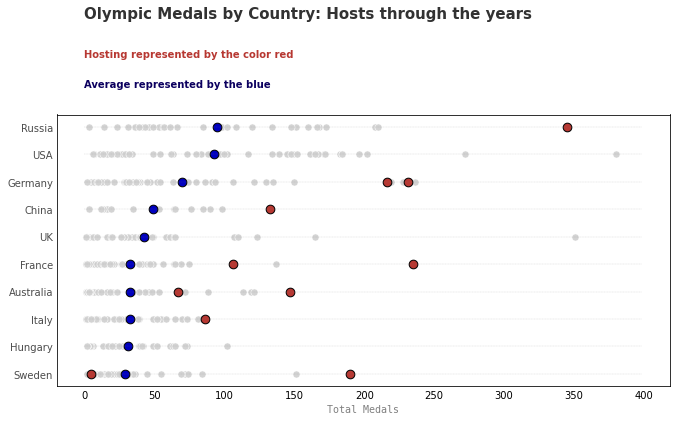

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(11, 5))


# top 10
top_list_ = medals.groupby('region')['Total Medals'].mean().sort_values(ascending=False).reset_index()[:10].sort_values(by='Total Medals',ascending=True)

plot = 1
for country in top_list_['region']:
    mean = medals[medals['region'] == country].groupby('region')['Total Medals'].mean()

    # historic scores
    sns.scatterplot(data=medals[medals['region'] == country], y=plot, x='Total Medals',color='lightgray',s=50,ax=ax)

    # mean score
    sns.scatterplot(data=medals[medals['region'] == country], y=plot, x=mean,color='#0000c0',ec='black',linewidth=1,s=75,ax=ax)
    
    # Hosting score
    sns.scatterplot(data=(medals[(medals['region'] == country) & (medals['Is_Host'] == 1)]), y=plot, x='Total Medals',color='#B73832',ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['region'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',color='gray')

ax.hlines(y=top_list_.index+1, xmin=0, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)




ax.text(0,Yend+3.5, 'Olympic Medals by Country: Hosts through the years', fontsize=15,fontweight='bold',color='#323232')
ax.text(0,Yend+2.1, 'Hosting represented by the color red', fontsize=10,fontweight='bold',color='#B73832')
ax.text(0,Yend+1, 'Average represented by the blue', fontsize=10,fontweight='bold',color='#0c005f')


plt.show()



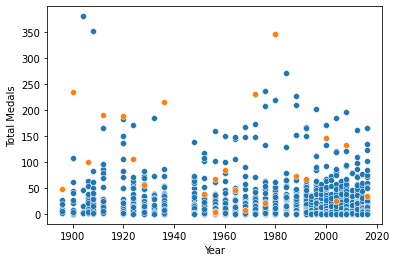

In [ ]:
not_host = medals[medals['Is_Host'] == 0]
host = medals[medals['Is_Host'] == 1]

sns.scatterplot(x = not_host['Year'] , y = not_host['Total Medals'])
sns.scatterplot( x = host['Year'] , y = host['Total Medals'])


In [ ]:
host_list = list(medals.query("Is_Host == 1")['Host_Country'].value_counts().index)

medals['Total_Medals_NaturalLog'] = np.log(medals['Total Medals'])

Not_hosting_samples = medals[medals['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'].count()
hosting_samples = medals[medals['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'].count()

Not_hosting_mean = medals[medals['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'].mean()
hosting_mean = medals[medals['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'].mean()

Not_hosting_std = medals[medals['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'].std()
hosting_std = medals[medals['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'].std()

findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


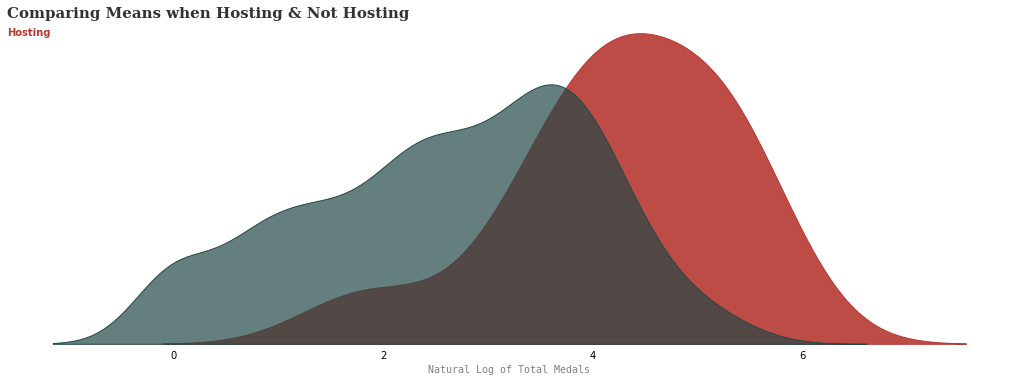

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
sns.kdeplot(data=medals[medals['region'].isin(host_list)].query("Is_Host == 1"), x='Total_Medals_NaturalLog',shade=True,color='#B73832',alpha=0.9, ax=ax)
sns.kdeplot(data=medals[medals['region'].isin(host_list)].query("Is_Host == 0"), x='Total_Medals_NaturalLog', shade=True, color='#244747',alpha=0.7, ax=ax)





for s in ['top','left', 'bottom', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_xlabel("Natural Log of Total Medals",fontfamily='monospace',color='gray')
ax.get_yaxis().set_visible(False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 


Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend, 'Comparing Means when Hosting & Not Hosting', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend-0.02, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')



plt.show()

#Getting the main characteristics to win a medal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
tmp_medal = Olympics_data_cleaned[Olympics_data_cleaned.Medal.notnull()]
tmp_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN,United States of America
33,7597,Bao Yingying,F,24.0,172.0,67.0,China,CHN,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Women's Sabre, Team",Silver,China,NaN,China
53,17282,Cai Huijue,F,16.0,174.0,63.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze,China,NaN,United States of America
63,17289,Cai Tongtong,F,18.0,168.0,48.0,China,CHN,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Silver,China,NaN,China
87,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China,NaN,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270193,113752,"Malcolm Emanuel Augustus ""Mal"" Spence",M,24.0,177.0,71.0,West Indies Federation,WIF,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze,Trinidad,West Indies Federation,Italy
270195,129205,"James Edward ""Jim"" Wedderburn",M,22.0,178.0,73.0,West Indies Federation,WIF,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze,Trinidad,West Indies Federation,Italy
270328,86592,Vnuste Niyongabo,M,22.0,176.0,60.0,Burundi,BDI,1996 Summer,1996,Summer,Atlanta,Athletics,"Athletics Men's 5,000 metres",Gold,Burundi,NaN,United States of America
270492,48966,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,Vietnam,NaN,Brazil


In [ ]:
total_medals =  Olympics_data_cleaned.groupby(['Sex','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

total_medals['Total'] = total_medals['Bronze'] + total_medals['Silver'] + total_medals['Gold']

total_medals = total_medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)
total_medals

Medal,Bronze,Silver,Gold,Total
Sex,,,,
M,8385,8304,8378,25067
F,3167,3152,3099,9418


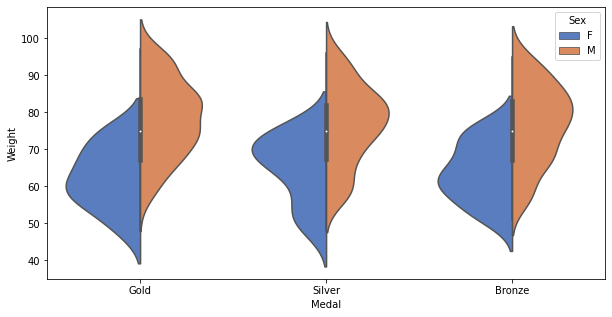

In [ ]:
Weightlifting = tmp_medal.loc[tmp_medal['Sport'] == 'Weightlifting']

ax = sns.violinplot(x="Medal", y="Weight", hue="Sex", data=Weightlifting, palette="muted", split=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Heightfor Basketball athletics')

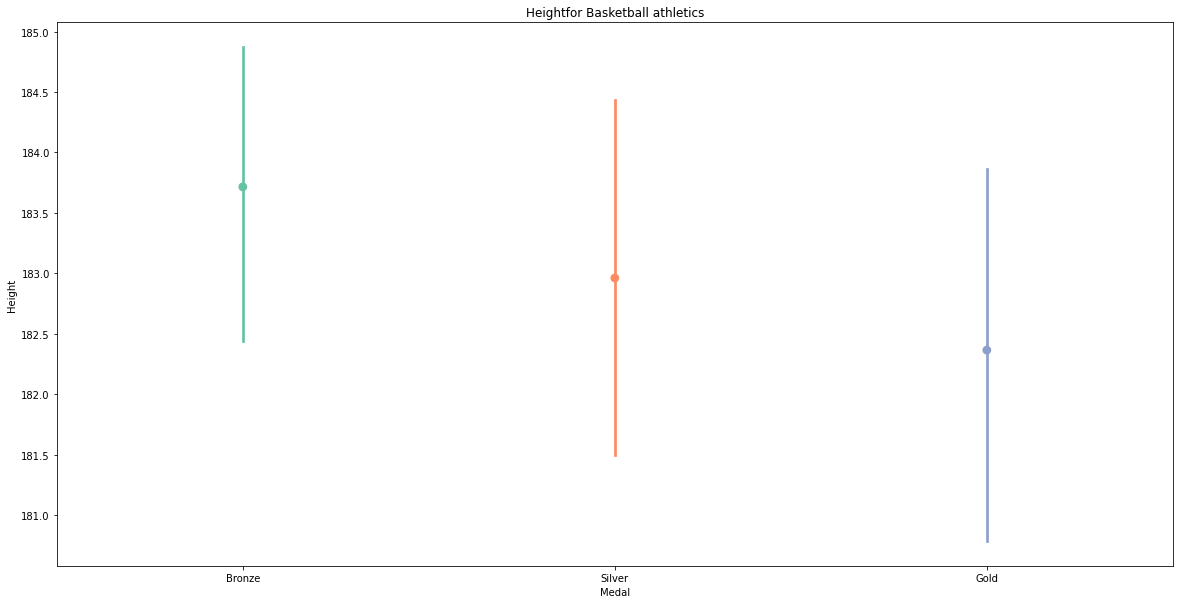

In [ ]:
Basketball = tmp_medal.loc[tmp_medal['Sport'] == 'Basketball']

plt.figure(figsize=(20, 10))
sns.pointplot('Medal', 'Height', data=Basketball, palette='Set2')
plt.title('Heightfor Basketball athletics')

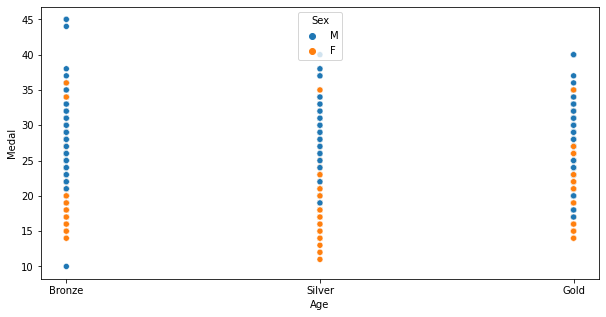

In [ ]:
Gymnastics = tmp_medal.loc[tmp_medal['Sport'] == 'Gymnastics']

sns.scatterplot(x=Gymnastics.Medal, y=Gymnastics.Age, hue='Sex', data=tmp_medal)
plt.xlabel("Age")
plt.ylabel("Medal");

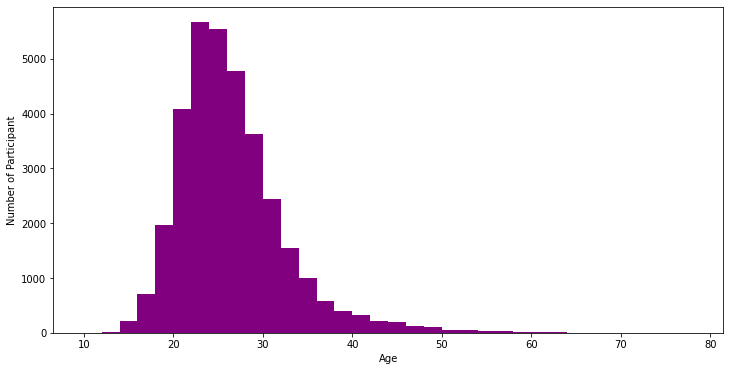

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure

plt.figure(figsize=(12, 6))
# plt.title(df.Age)
plt.xlabel('Age')
plt.ylabel('Number of Participant')

plt.hist(tmp_medal.Age, bins=np.arange(10,80,2), color='purple');

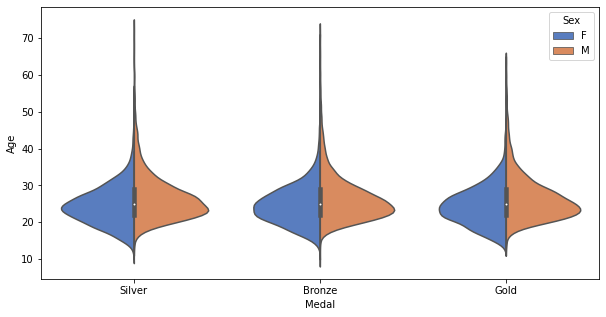

In [ ]:
var = sns.violinplot(x="Medal", y="Age", hue="Sex", data=Olympics_data_cleaned, palette="muted", split=True)


In [ ]:
medals_graphs = df.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

medals_graphs['Total'] = medals_graphs['Bronze'] + medals_graphs['Silver'] + medals_graphs['Gold']

medals_graphs = medals_graphs[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)

medals_graphs.iloc[:15].style.set_caption('Medals by Country: Summer Olympic Games [Top 15]')\
.bar(subset=['Gold'], color='#f0c05a')\
.bar(subset=['Silver'], color='Lightgray')\
.bar(subset=['Bronze'], color='#a97142')\

#.background_gradient(subset=['Total'], cmap='BuGn')

Medal,Bronze,Silver,Gold,Total
region,,,,
USA,1358,1641,2638,5637
Russia,1178,1170,1599,3947
Germany,1260,1195,1301,3756
UK,651,739,678,2068
France,666,610,501,1777
Italy,531,531,575,1637
Sweden,535,522,479,1536
Canada,451,438,463,1352
Australia,522,459,368,1349


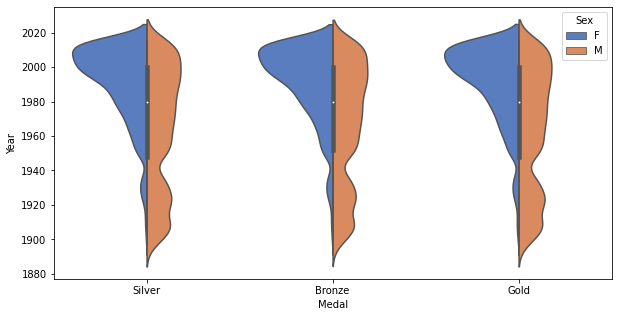

In [ ]:
var = sns.violinplot(x="Medal", y="Year", hue="Sex", data=Olympics_data_cleaned, palette="muted", split=True)


Text(0.5, 1.0, 'Variation of Female Athletes over time')

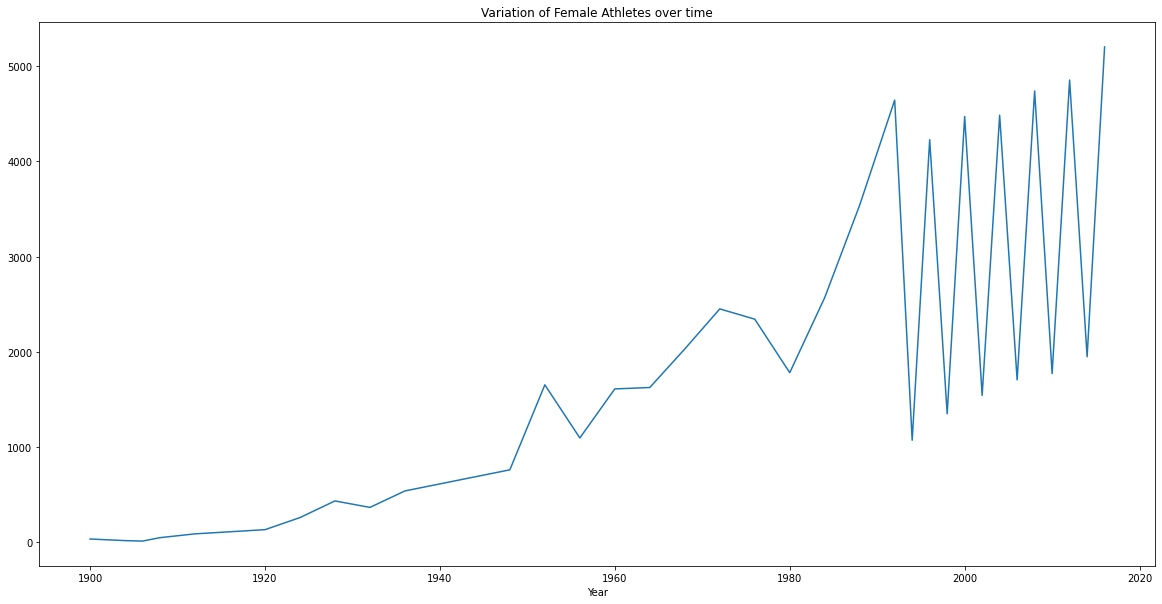

In [ ]:
#females
part = Females.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

Text(0.5, 1.0, 'Variation of Male Athletes over time')

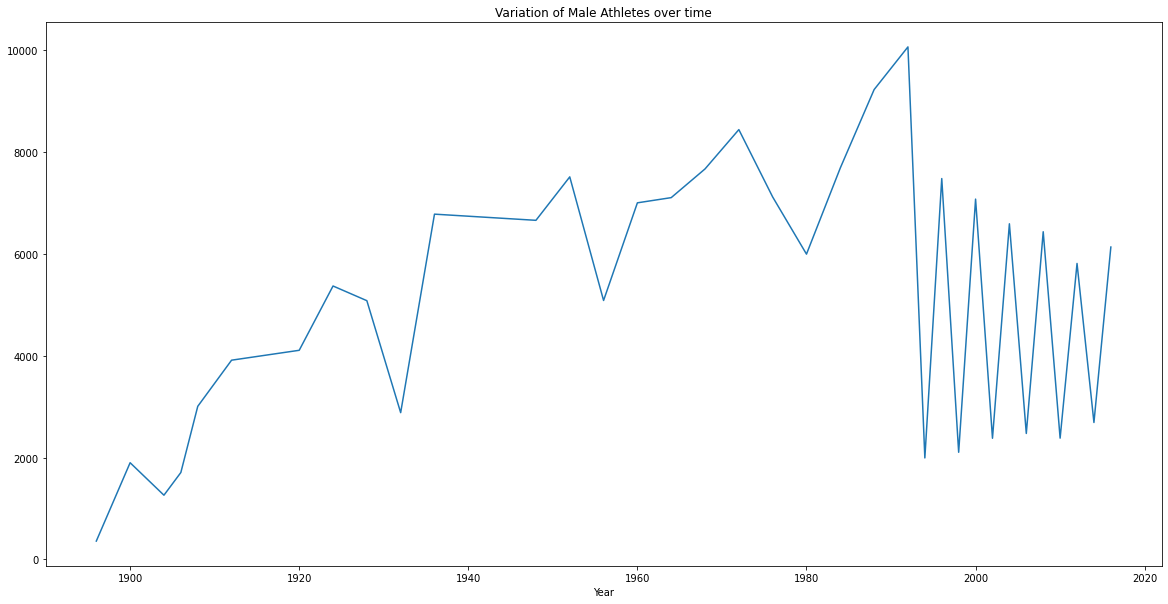

In [ ]:
#males
part = Males.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Sports for Males over time')

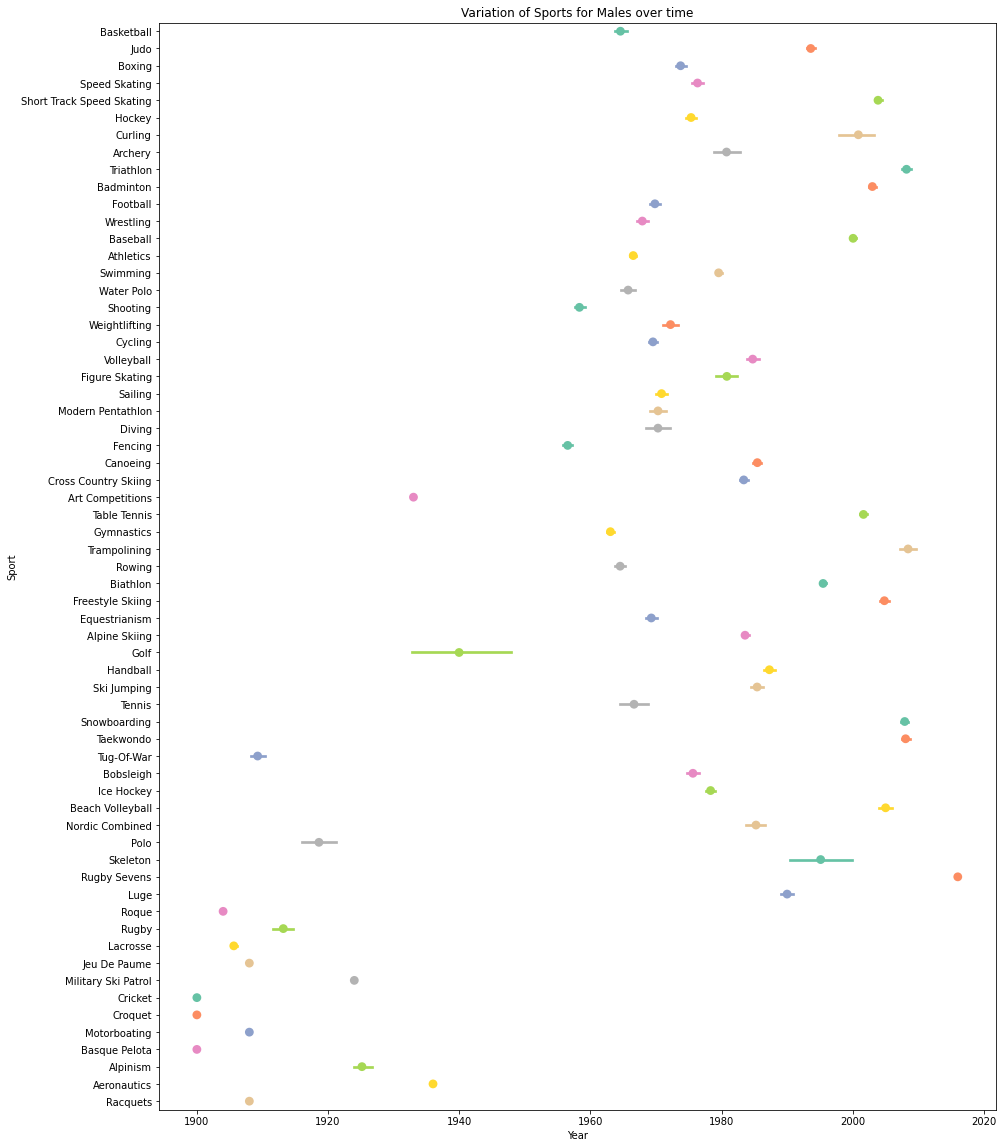

In [ ]:
plt.figure(figsize=(15, 20))
sns.pointplot('Year', 'Sport', data=Males, palette='Set2')
plt.title('Variation of Sports for Males over time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Sports for Females over time')

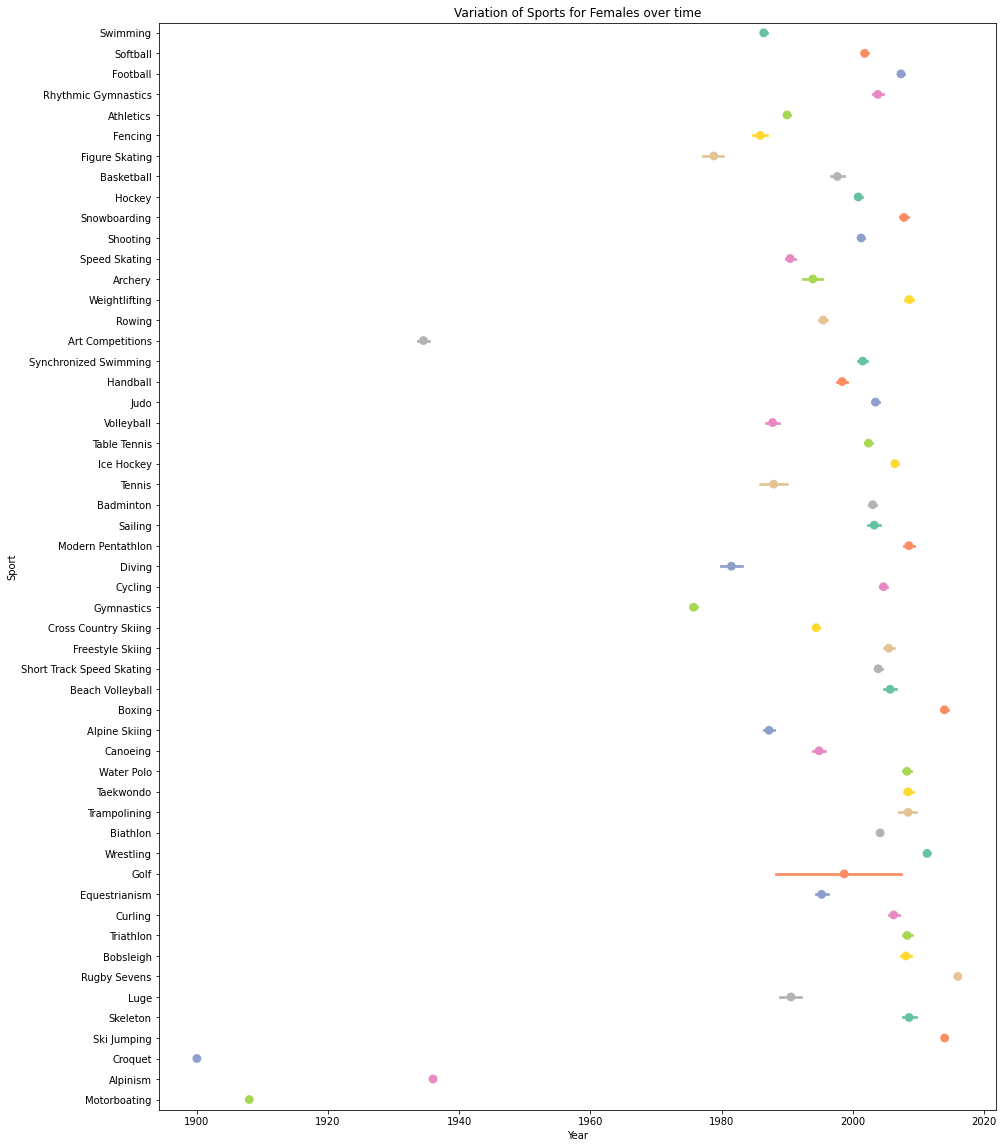

In [ ]:
plt.figure(figsize=(15, 20))
sns.pointplot('Year', 'Sport', data=Females, palette='Set2')
plt.title('Variation of Sports for Females over time')

Text(0.5, 1.0, 'Women medals per edition of the Games')

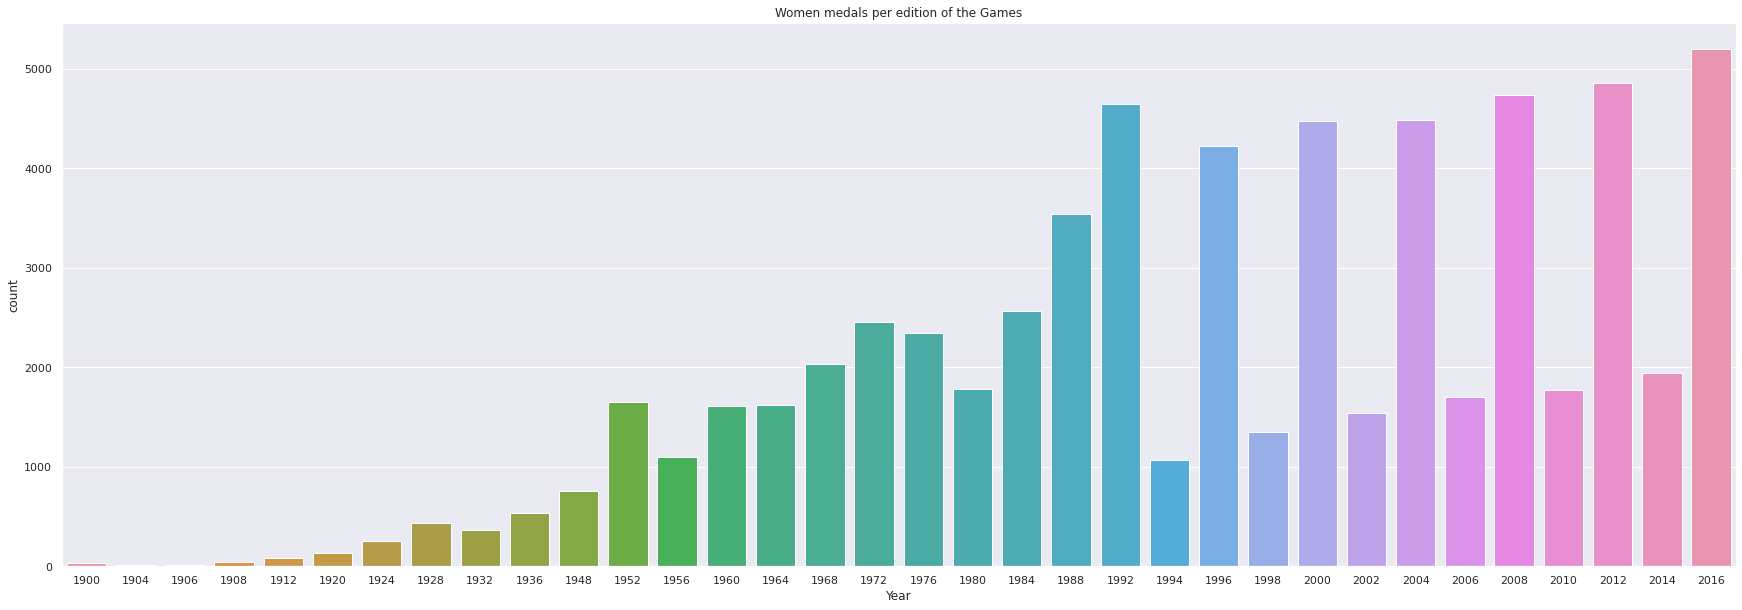

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(30, 10))
sns.countplot(x='Year', data=Females)
plt.title('Women medals per edition of the Games')

Text(0.5, 1.0, 'Mel medals per edition of the Games')

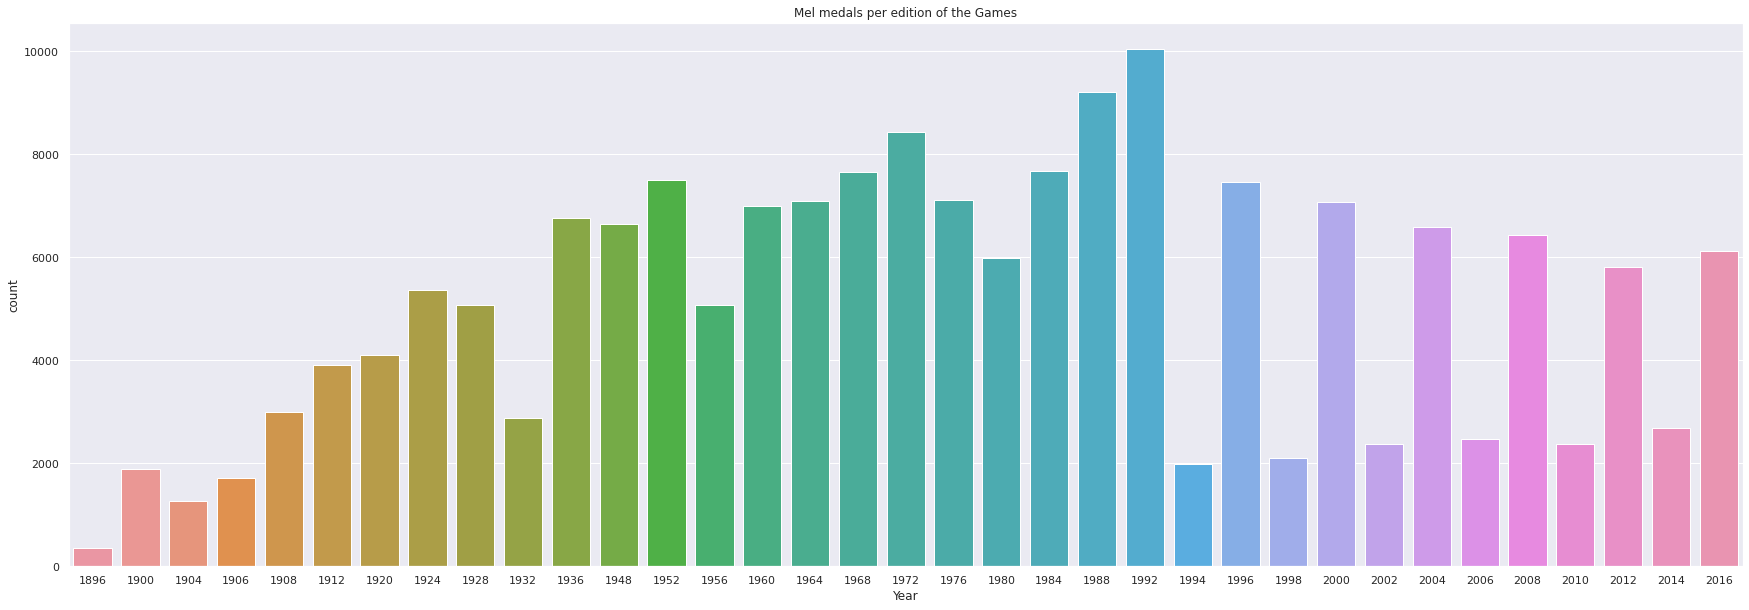

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(30, 10))
sns.countplot(x='Year', data=Males)
plt.title('Mel medals per edition of the Games')

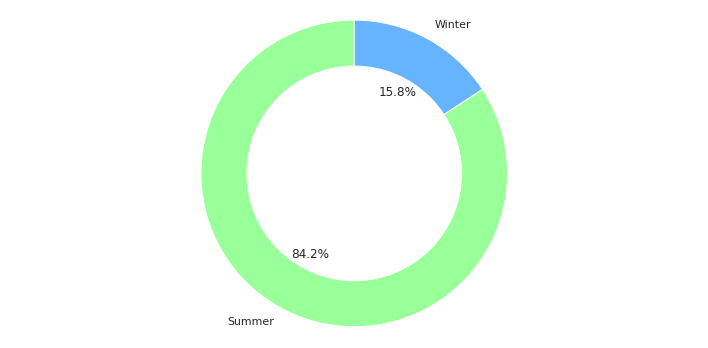

In [ ]:
Diff_seasons = tmp_medal.Season.value_counts()
Diff_seasons

fig1, ax1 = plt.subplots()

colors = ['#99ff99','#66b3ff']

ax1.pie(Diff_seasons, colors = colors, labels=Diff_seasons.index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
summer_data =Olympics_data_cleaned[Olympics_data_cleaned['Season']=='Summer']
summer_data = summer_data[summer_data.Medal.notnull()]
# summer_data

winter_data =Olympics_data_cleaned[Olympics_data_cleaned['Season']=='Winter']
winter_data = winter_data[winter_data.Medal.notnull()]

summer_data = summer_data.groupby(['Year'])
winter_data = winter_data.groupby(['Year'])

In [ ]:
#summer
plt.sca

<function matplotlib.pyplot.sca>

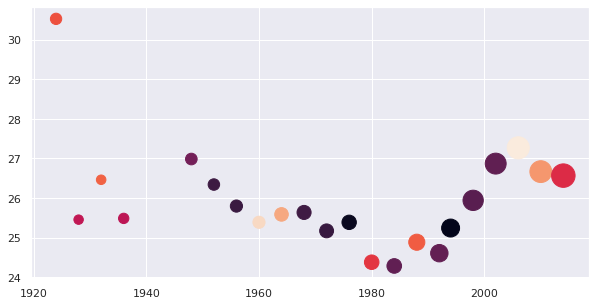

In [ ]:
#winter
plt.scatter(winter_data .mean().index,winter_data .Age.mean().values,s = winter_data .Medal.count().values, c= np.random.randn(len(winter_data )))

#Checking the performance before and after getting the regions' first gold medal

In [ ]:
gold = Olympics_data_cleaned[Olympics_data_cleaned['Medal']=='Gold']
grouped = gold.sort_values(by=['Year']).groupby(['region']).first()
grouped

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,notes,Host_Country
region,,,,,,,,,,,,,,,,,
Algeria,14046,Hassiba Boulmerka,F,24.0,158.000000,49.000000,Algeria,ALG,1992 Summer,1992,Summer,Barcelona,Athletics,"Athletics Women's 1,500 metres",Gold,None,Spain
Argentina,58740,Arturo Juan Kenny y Gahan,M,35.0,171.000000,67.032258,Argentina,ARG,1924 Summer,1924,Summer,Paris,Polo,Polo Men's Polo,Gold,None,France
Armenia,84861,Armen Lyudvikovich Nazaryan,M,22.0,162.000000,60.000000,Armenia,ARM,1996 Summer,1996,Summer,Atlanta,Wrestling,"Wrestling Men's Flyweight, Greco-Roman",Gold,None,United States of America
Australia,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,181.457529,73.232033,Australia,AUS,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Gold,Australasia,Greece
Austria,107006,Felix Adolf Schmal,M,23.0,179.514019,70.242991,Austria,AUT,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 12-Hours Race,Gold,None,Greece
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,4042,Jos Leandro Andrade,M,22.0,179.000000,77.000000,Uruguay,URU,1924 Summer,1924,Summer,Paris,Football,Football Men's Football,Gold,None,France
Uzbekistan,20535,Lina Anatolyevna Cheryazova,F,25.0,164.000000,60.000000,Uzbekistan,UZB,1994 Winter,1994,Winter,Lillehammer,Freestyle Skiing,Freestyle Skiing Women's Aerials,Gold,None,Other
Venezuela,101753,Francisco Antonio Rodrguez Brito,M,23.0,174.000000,60.000000,Venezuela,VEN,1968 Summer,1968,Summer,Mexico City,Boxing,Boxing Men's Light-Flyweight,Gold,None,Mexico


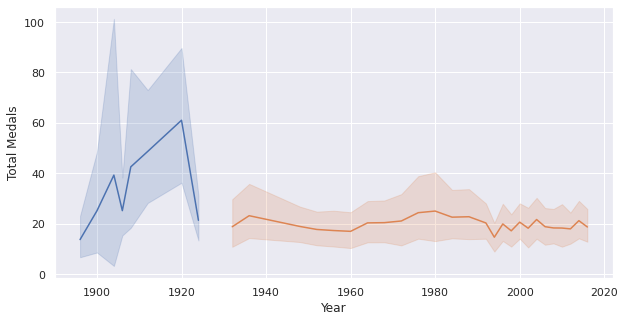

In [ ]:
total = [host, not_host]
total_m = pd.concat(total)

first_gold_japan = grouped[grouped.index == 'Japan'].Year.values[0]


before_gold_japan = total_m[total_m['Year'] < first_gold_japan] 
after_gold_japan = total_m[total_m['Year'] > first_gold_japan] 

sns.lineplot(x="Year", y="Total Medals",data=before_gold_japan)
sns.lineplot(x="Year", y="Total Medals",data=after_gold_japan)

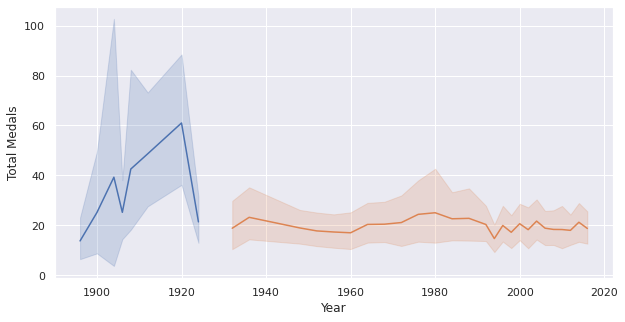

In [ ]:
first_gold_Egypt = grouped[grouped.index == 'Egypt'].Year.values[0]


before_gold_Egypt = total_m[total_m['Year'] < first_gold_Egypt] 
after_gold_Egypt = total_m[total_m['Year'] > first_gold_Egypt] 

sns.lineplot(x="Year", y="Total Medals",data=before_gold_Egypt)
sns.lineplot(x="Year", y="Total Medals",data=after_gold_Egypt)

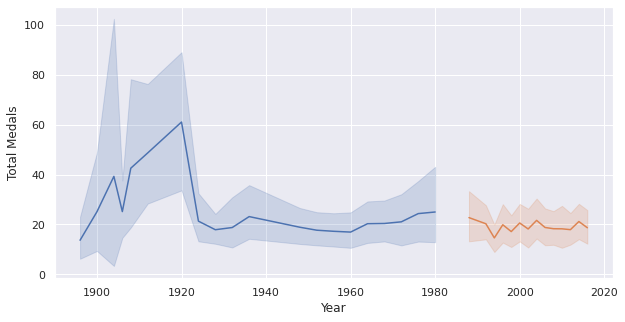

In [ ]:
first_gold_China = grouped[grouped.index == 'China'].Year.values[0]


before_gold_China = total_m[total_m['Year'] < first_gold_China] 
after_gold_China = total_m[total_m['Year'] > first_gold_China] 

sns.lineplot(x="Year", y="Total Medals",data=before_gold_China)
sns.lineplot(x="Year", y="Total Medals",data=after_gold_China)

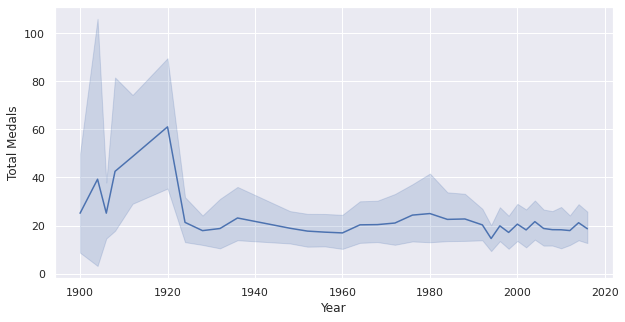

In [ ]:
first_gold_Germany = grouped[grouped.index == 'Germany'].Year.values[0]


before_gold_Germany = total_m[total_m['Year'] < first_gold_Germany] 
after_gold_Germany = total_m[total_m['Year'] > first_gold_Germany] 

sns.lineplot(x="Year", y="Total Medals",data=before_gold_Germany)
sns.lineplot(x="Year", y="Total Medals",data=after_gold_Germany)